In [112]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Loading Dataset

In [113]:
path = kagglehub.dataset_download("arashnic/fitbit")
print(path)
os.listdir(path)
activity_file = os.path.join(
    path,
    "mturkfitbit_export_3.12.16-4.11.16",
    "Fitabase Data 3.12.16-4.11.16",
    "dailyActivity_merged.csv"
)

df = pd.read_csv(activity_file)
df.head()

Using Colab cache for faster access to the 'fitbit' dataset.
/kaggle/input/fitbit


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


# **Dataset Context**

In [114]:
df.shape

(457, 15)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-null    int64  
 14  Calories  

In [116]:
df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,4.570000e+02,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,4.628595e+09,6546.562363,4.663523,4.609847,0.179427,1.180897,0.478643,2.890197,0.001904,16.623632,13.070022,170.070022,995.282276,2189.452954
std,2.293781e+09,5398.493064,4.082072,4.068540,0.849232,2.487159,0.830995,2.237523,0.008487,28.919704,36.208635,122.205372,337.021404,815.484523
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,0.000000
25%,2.347168e+09,1988.000000,1.410000,1.280000,0.000000,0.000000,0.000000,0.870000,0.000000,0.000000,0.000000,64.000000,728.000000,1776.000000
50%,4.057193e+09,5986.000000,4.090000,4.090000,0.000000,0.000000,0.020000,2.930000,0.000000,0.000000,1.000000,181.000000,1057.000000,2062.000000
75%,6.391747e+09,10198.000000,7.160000,7.110000,0.000000,1.310000,0.670000,4.460000,0.000000,25.000000,16.000000,257.000000,1285.000000,2667.000000
max,8.877689e+09,28497.000000,27.530001,27.530001,6.727057,21.920000,6.400000,12.510000,0.100000,202.000000,660.000000,720.000000,1440.000000,4562.000000


# **Redundancy check**

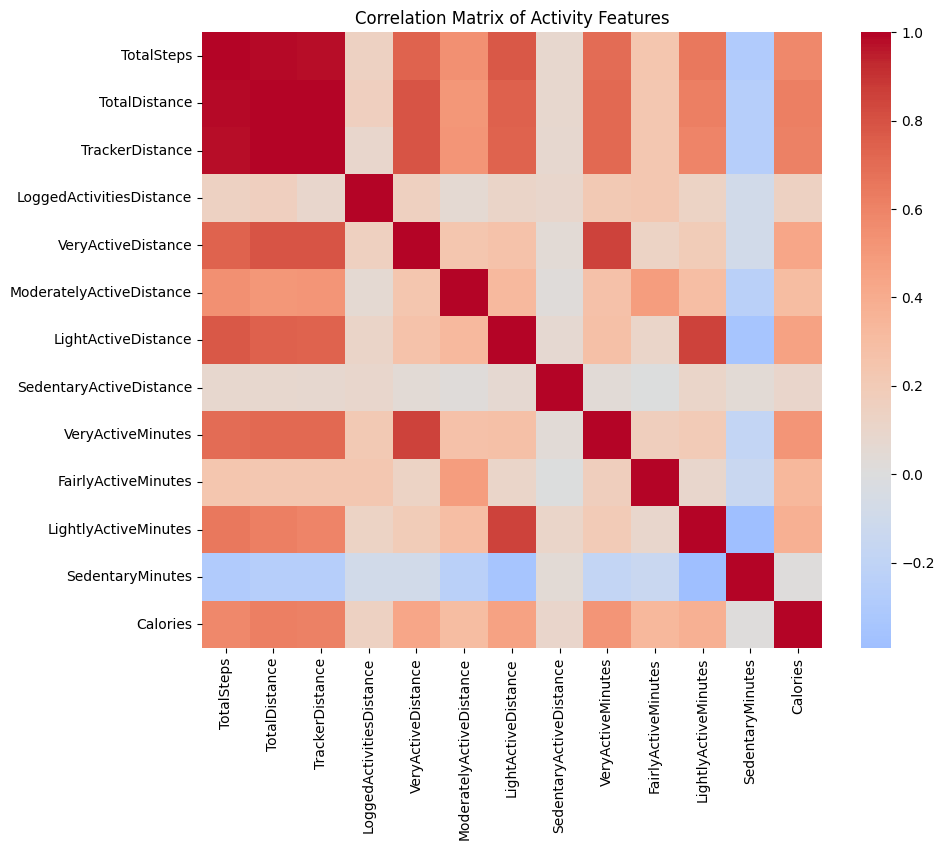

In [117]:
numeric_cols = df.drop(columns=["Id", "ActivityDate"])
corr = numeric_cols.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Activity Features")
plt.show()

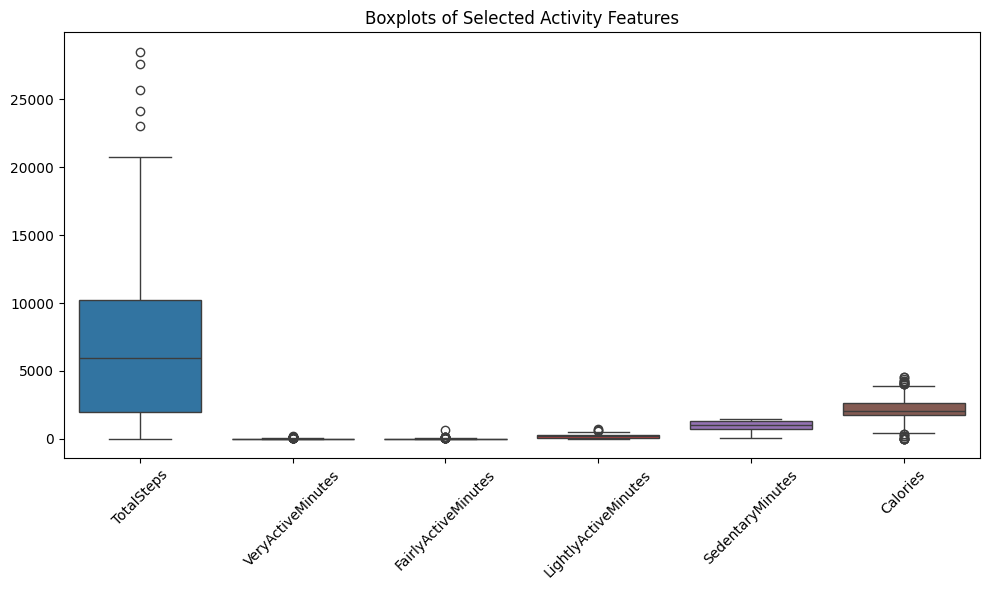

In [123]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_clean)
plt.xticks(rotation=45)
plt.title("Boxplots of Selected Activity Features")
plt.tight_layout()
plt.show()

# **Feature Engineering**

In [119]:
selected_features = [
    "TotalSteps",
    "VeryActiveMinutes",
    "FairlyActiveMinutes",
    "LightlyActiveMinutes",
    "SedentaryMinutes",
    "Calories"
]

df_clean = df[selected_features].copy()
df_clean.head()

,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,11004,33,12,205,804,1819
1,17609,89,17,274,588,2154
2,12736,56,5,268,605,1944
3,13231,39,20,224,1080,1932
4,12041,28,28,243,763,1886


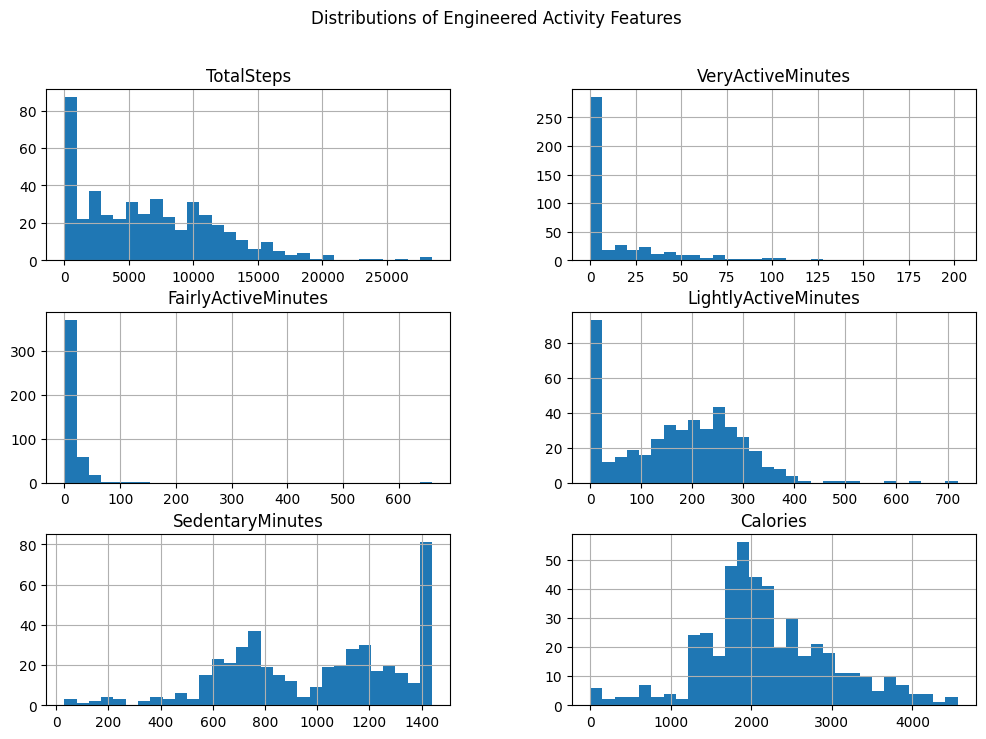

In [99]:
df_clean.hist(figsize=(12,8), bins=30)
plt.suptitle("Distributions of Engineered Activity Features")
plt.show()

# **Log Transform**

In [100]:
df_log = np.log1p(df_clean)
df_log.head()

,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,9.306105,3.526361,2.564949,5.327876,6.690842,7.506592
1,9.776222,4.499810,2.890372,5.616771,6.378426,7.675546
2,9.452266,4.043051,1.791759,5.594711,6.406880,7.573017
3,9.490393,3.688879,3.044522,5.416100,6.985642,7.566828
4,9.396156,3.367296,3.367296,5.497168,6.638568,7.542744


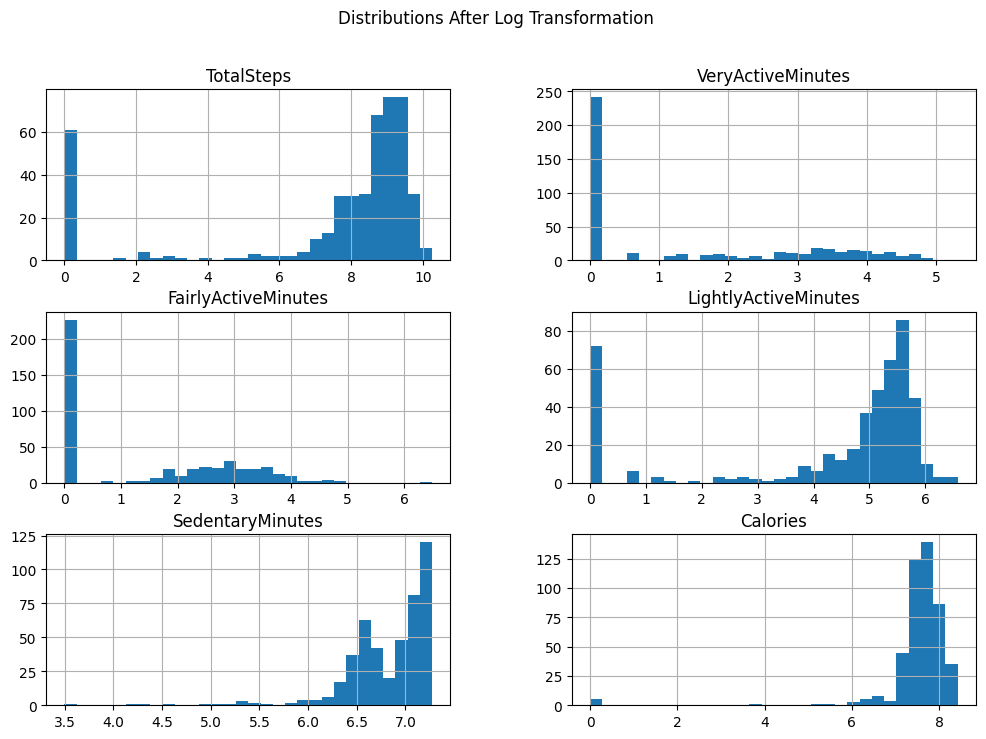

In [101]:
df_log.hist(figsize=(12,8), bins=30)
plt.suptitle("Distributions After Log Transformation")
plt.show()

# **Standard Scaler**

In [102]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_log)

X_scaled[:5]

array([[ 6.15068866e-01,  1.20039595e+00,  7.18473202e-01,
         5.24965373e-01, -2.77359889e-01, -3.82593200e-02],
       [ 7.64741162e-01,  1.76510273e+00,  9.27532766e-01,
         6.66090410e-01, -9.41000765e-01,  1.47641235e-01],
       [ 6.61602616e-01,  1.50013299e+00,  2.21756502e-01,
         6.55314248e-01, -8.80558595e-01,  3.48287193e-02],
       [ 6.73741195e-01,  1.29467467e+00,  1.02656305e+00,
         5.68062869e-01,  3.48859531e-01,  2.80192000e-02],
       [ 6.43738554e-01,  1.10812106e+00,  1.23392083e+00,
         6.07664463e-01, -3.88402463e-01,  1.51851529e-03]])

# **PCA**

In [ ]:
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

explained_variance = pca_full.explained_variance_ratio_
explained_variance

array([0.50876261, 0.18430319, 0.15393677, 0.09877376, 0.03923785,
       0.01498582])

In [ ]:
total_variance = explained_variance.sum()
total_variance

np.float64(1.0)

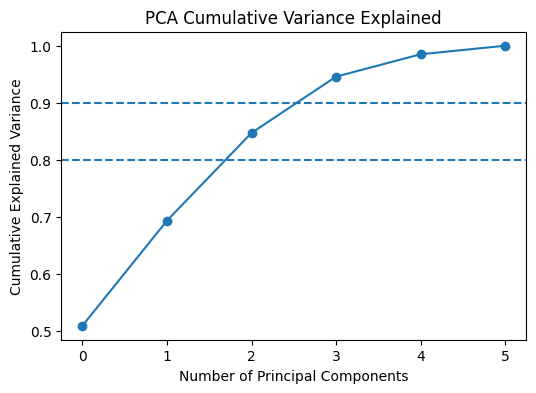

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Cumulative Variance Explained")
plt.axhline(0.8, linestyle='--')
plt.axhline(0.9, linestyle='--')
plt.show()

**PCA Dataset**

In [103]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

pca_3 = PCA(n_components=3)
X_pca_3 = pca_3.fit_transform(X_scaled)

In [104]:
X_cluster = X_pca_3   # use PCA-3 consistently for all clustering

# **Model Optimization**

**Elbow Method**

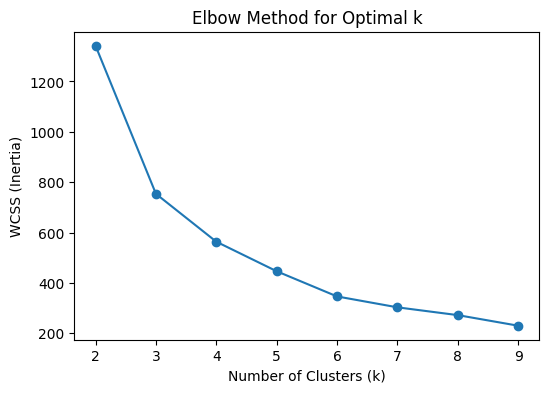

In [106]:
wcss = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()

**Silhouette Analysis**

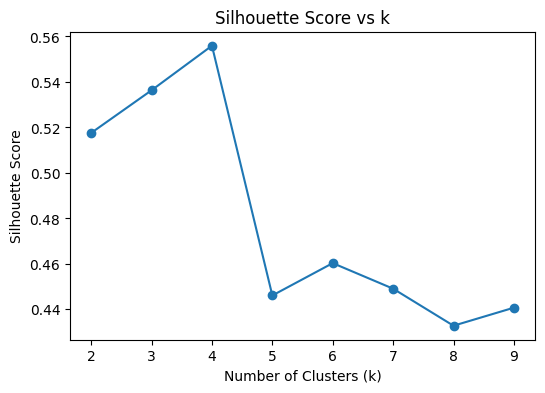

In [107]:
sil_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_cluster)
    sil_scores.append(silhouette_score(X_cluster, labels))

plt.figure(figsize=(6,4))
plt.plot(K_range, sil_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs k")
plt.show()

# **Optimized K-Means Model**

In [108]:
kmeans_final = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans_final.fit_predict(X_cluster)

cluster_labels[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
df_clean["Cluster"] = cluster_labels
df_clean.head()

,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Cluster
0,11004,33,12,205,804,1819,1
1,17609,89,17,274,588,2154,1
2,12736,56,5,268,605,1944,1
3,13231,39,20,224,1080,1932,1
4,12041,28,28,243,763,1886,1


In [ ]:
cluster_summary = df_clean.groupby("Cluster").mean()
cluster_summary

,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
Cluster,,,,,,
0,62.662162,1.337838,8.918919,0.243243,1310.959459,1569.743243
1,10848.110577,35.966346,24.600962,232.990385,877.860577,2585.788462
2,4175.628571,0.097143,1.120000,167.097143,1001.360000,1980.428571


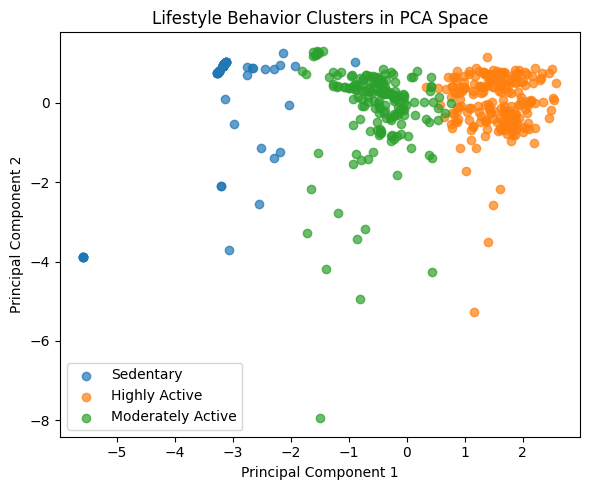

In [109]:
cluster_names = {
    0: "Sedentary",
    1: "Highly Active",
    2: "Moderately Active"
}

plt.figure(figsize=(6,5))

for cluster in np.unique(cluster_labels):
    plt.scatter(
        X_pca_2[cluster_labels == cluster, 0],
        X_pca_2[cluster_labels == cluster, 1],
        label=cluster_names[cluster],
        alpha=0.7
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Lifestyle Behavior Clusters in PCA Space")
plt.legend()
plt.tight_layout()
plt.show()

In [110]:
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
cluster_percent = cluster_counts / len(cluster_labels) * 100

pd.DataFrame({
    "Count": cluster_counts,
    "Percentage": cluster_percent.round(2)
})


,Count,Percentage
0,74,16.19
1,208,45.51
2,175,38.29


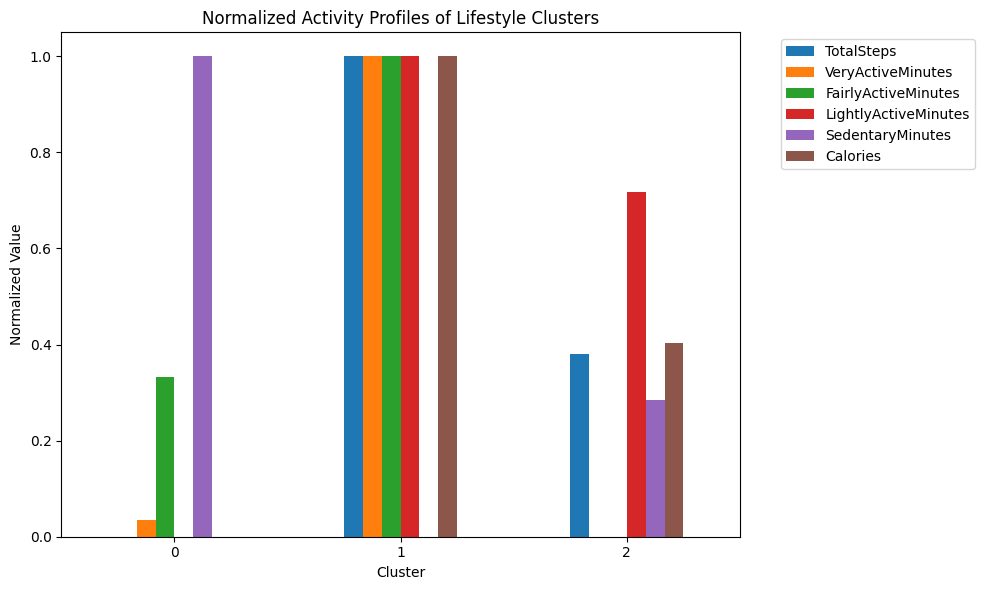

In [ ]:
cluster_profile_norm = (cluster_summary - cluster_summary.min()) / \
                       (cluster_summary.max() - cluster_summary.min())

cluster_profile_norm.plot(kind="bar", figsize=(10,6))

plt.title("Normalized Activity Profiles of Lifestyle Clusters")
plt.ylabel("Normalized Value")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# **Model Comparison**

In [ ]:
models = {}

# KMeans
models["KMeans"] = cluster_labels

# Hierarchical
hier_labels = AgglomerativeClustering(n_clusters=3).fit_predict(X_cluster)
models["Hierarchical"] = hier_labels

# DBSCAN
db_labels = DBSCAN(eps=0.5, min_samples=5).fit_predict(X_cluster)
models["DBSCAN"] = db_labels

# GMM
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_cluster)
models["GMM"] = gmm_labels


results = []

for name, labels in models.items():
    if len(set(labels)) > 1:
        results.append({
            "Model": name,
            "Silhouette": silhouette_score(X_cluster, labels),
            "Calinski-Harabasz": calinski_harabasz_score(X_cluster, labels),
            "Davies-Bouldin": davies_bouldin_score(X_cluster, labels)
        })

comparison = pd.DataFrame(results)
comparison

,Model,Silhouette,Calinski-Harabasz,Davies-Bouldin
0,KMeans,0.536331,472.508440,0.711939
1,Hierarchical,0.513566,394.225990,0.837745
2,DBSCAN,0.526760,327.612281,0.943257
3,GMM,0.521460,432.573918,0.730504


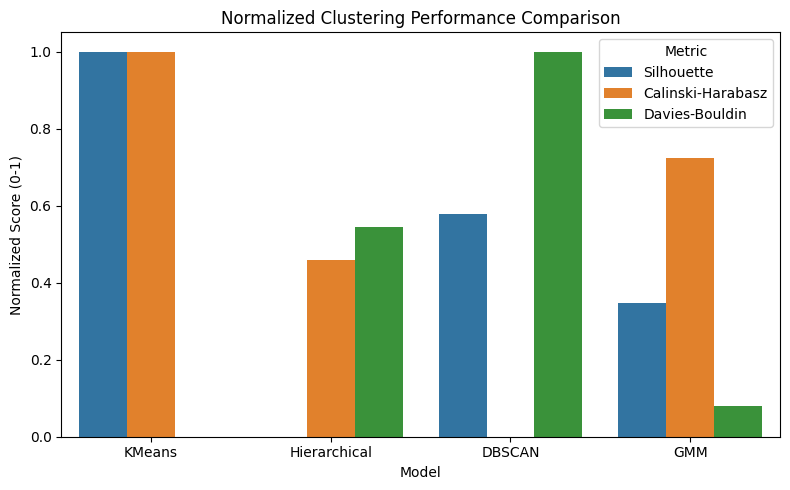

In [ ]:
from sklearn.preprocessing import MinMaxScaler

comparison_norm = comparison.copy()


scaler = MinMaxScaler()
comparison_norm[["Silhouette", "Calinski-Harabasz", "Davies-Bouldin"]] = \
    scaler.fit_transform(comparison_norm[["Silhouette", "Calinski-Harabasz", "Davies-Bouldin"]])

# Melt for plotting
comparison_melted = comparison_norm.melt(
    id_vars="Model",
    var_name="Metric",
    value_name="Normalized Score"
)

plt.figure(figsize=(8,5))
sns.barplot(
    data=comparison_melted,
    x="Model",
    y="Normalized Score",
    hue="Metric"
)

plt.title("Normalized Clustering Performance Comparison")
plt.ylabel("Normalized Score (0-1)")
plt.tight_layout()
plt.show()
